<center><img src="./../data/besm.png" alt="In the name of Allah" width="150"></center>

<style>
    
@font-face {font-family: "B Lotus"; src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot"); src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot?#iefix") format("embedded-opentype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff2") format("woff2"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff") format("woff"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.ttf") format("truetype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.svg#B Lotus") format("svg"); }


</style>

<center style ='font-family: "B Lotus";'>تمرین اول - درس پردازش زبان‌های طبیعی</center>
<center style ='font-family: "B Lotus";'>ترم ۱۴۰۱۱ - دانشکده مهندسی کامپیوتر</center>
<hr>
<center style ='font-family: "B Lotus";'>محمدحسین موثقی‌نیا</center>
<center style ='font-family: "B Lotus";'>۴۰۰۲۰۰۹۱۹</center>
<hr>

<div style="direction:rtl; font-family: 'B Lotus';">نصب و فراخوانی کتابخانه‌های مورد نیاز:</div>

In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tqdm
!pip install hazm
!pip install wordcloud_fa
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 26.7 MB/s 
     |████████████████████████████████| 233 kB 60.6 MB/s 
     |████████████████████████████████| 1.4 MB 42.7 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394489 sha256=97ecb119e55fc60c142e7d9fd956d5a2589d4cb51bd8c14bf69a813a5afb0a56
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_6

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
from wordcloud_fa import WordCloudFa
from __future__ import unicode_literals
import hazm
import random
import codecs
from nltk import FreqDist
import itertools

<div style="direction:rtl; font-family: 'B Lotus';">زمانی که از <code>google-colab</code> استفاده می‌شود باید دو مورد زیر اضافه شود:</div>

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# os.chdir('/content/drive/MyDrive/NLP/hw1/nlp/hw1/code/')

<div style="direction:rtl; font-family: 'B Lotus';">تعریف الفباهای مورد نیاز، شامل موارد:</div>
<ul style="direction:rtl; font-family: 'B Lotus';">
  <li>الفبای زبان فارسی</li>
  <li>علائم سجاوندی</li>
  <li>اعداد فارسی و انگلیسی</li>
  <li>لیست ایموجی&zwnj;ها &laquo;از این <a href="https://unicode.org/Public/emoji/15.0/" rel="noopener noreferrer" target="_blank">لینک</a> استفاده شده است&raquo;</li>
</ul> 

In [86]:
persian_alphabet = ["آ","ا","أ","ئ","ب","پ","ت","ث","ج","چ","ح","خ","د","ذ","ر","ز","ژ","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ک","گ","ل","م","ن","و","ه","ی"]
decorative_signs = [" ", ",", ":", "؛", "|", "\\", "*", "\u200C", "٬", "!", "؟", "?", "(", ")", ".", "،", "%", "٪", "ـ", "-", "+", "=", "`", "~", "ء", "ٔ", "ٓ", "«", "»", "ة", "]", "[", "ة", "{", "}"]
english_alphabet = [chr(i) for i in range(ord('A'), ord('Z')+1)]
english_alphabet.extend([chr(i) for i in range(ord('a'), ord('z')+1)])
persian_numbers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] 
english_numbers = ["۰", "۱", "۲", "۳", "۴", "۵", "۶", "۷", "۸", "۹"]

In [3]:
emoji_df = pd.read_csv('./../data/emoji_df.csv')

emoji_df_single = pd.DataFrame(columns=["emoji","name","group","sub_group","codepoints"])
emoji_df_multiple = pd.DataFrame(columns=["emoji","name","group","sub_group","codepoints"])

j = 0
k = 0
for i, code in enumerate(emoji_df['codepoints']):
    if len(code.split()) > 1:
        emoji_df_multiple.loc[j] = emoji_df.loc[i]
        j += 1
    else:
        emoji_df_single.loc[k] = emoji_df.loc[i]
        k += 1

emoji_df

,emoji,name,group,sub_group,codepoints
0,😀,grinning face,Smileys & Emotion,face-smiling,1F600
1,😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
2,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
3,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
4,😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606
...,...,...,...,...,...
4576,🇿🇲,flag: Zambia,Flags,country-flag,1F1FF 1F1F2
4577,🇿🇼,flag: Zimbabwe,Flags,country-flag,1F1FF 1F1FC
4578,🏴󠁧󠁢󠁥󠁮󠁧󠁿,flag: England,Flags,subdivision-flag,1F3F4 E0067 E0062 E0065 E006E E0067 E007F
4579,🏴󠁧󠁢󠁳󠁣󠁴󠁿,flag: Scotland,Flags,subdivision-flag,1F3F4 E0067 E0062 E0073 E0063 E0074 E007F


In [4]:
emoji_df_single

,emoji,name,group,sub_group,codepoints
0,😀,grinning face,Smileys & Emotion,face-smiling,1F600
1,😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
2,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
3,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
4,😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606
...,...,...,...,...,...
1315,🏁,chequered flag,Flags,flag,1F3C1
1316,🚩,triangular flag,Flags,flag,1F6A9
1317,🎌,crossed flags,Flags,flag,1F38C
1318,🏴,black flag,Flags,flag,1F3F4


In [5]:
emoji_df_multiple

,emoji,name,group,sub_group,codepoints
0,☺️,smiling face,Smileys & Emotion,face-affection,263A FE0F
1,😶‍🌫️,face in clouds,Smileys & Emotion,face-neutral-skeptical,1F636 200D 1F32B FE0F
2,😶‍🌫,face in clouds,Smileys & Emotion,face-neutral-skeptical,1F636 200D 1F32B
3,😮‍💨,face exhaling,Smileys & Emotion,face-neutral-skeptical,1F62E 200D 1F4A8
4,😵‍💫,face with spiral eyes,Smileys & Emotion,face-unwell,1F635 200D 1F4AB
...,...,...,...,...,...
3256,🇿🇲,flag: Zambia,Flags,country-flag,1F1FF 1F1F2
3257,🇿🇼,flag: Zimbabwe,Flags,country-flag,1F1FF 1F1FC
3258,🏴󠁧󠁢󠁥󠁮󠁧󠁿,flag: England,Flags,subdivision-flag,1F3F4 E0067 E0062 E0065 E006E E0067 E007F
3259,🏴󠁧󠁢󠁳󠁣󠁴󠁿,flag: Scotland,Flags,subdivision-flag,1F3F4 E0067 E0062 E0073 E0063 E0074 E007F


In [6]:
emoji_alphabet_single = list(emoji_df_single['emoji'])
emoji_alphabet_multiple = list(emoji_df_multiple['emoji'])
emoji_alphabet = list(emoji_df['emoji'])
len(emoji_alphabet), len(emoji_alphabet_single), len(emoji_alphabet_multiple)

(4581, 1320, 3261)

In [7]:
emoji_alphabet = emoji_alphabet_single

<div style="direction:rtl; font-family: 'B Lotus';">در این مرحله یک پیش&zwnj;پردازش اولیه انجام می&zwnj;شود:</div>
<ul style="direction:rtl; font-family: 'B Lotus';">
  <li>حذف <code>n\</code> های اضافه متن که منجر به اضافه شدن خطوط شده است</li>
  <li>حذف مواردی که به دلیل اشتباه تایپی یا ... tab زده شده است و به دلیل این که در فایل به عنوان delimiter از tab استفاده شده است، این موارد را با یک tab جایگزین می کنیم.</li>
</ul> 

In [8]:
def check_file_and_extract_data(num):
    f = open(f'./../result/comments_{num}.txt', 'r')
    text = f.readlines()
    f.close()

    text = [x.replace('\n', '').replace('\t\t', '\t').split('\t') for x in text]

    i = 0
    while i < len(text):
        if len(text[i]) == 2:
            i += 1
            text[i-1].append(text[i])
            text[i] = []
        i += 1

    while [] in text:
        text.remove([])
    
    for i, x in enumerate(text):
        if len(x) != 3 and x != []:
            print(f'ERROR [{i}]')
    return text

In [18]:
data = []
for i in range(1,4):
    data.extend(check_file_and_extract_data(i))

comments_data = [c[2] for c in data]
print(f'Comments number: {len(data)}')

Comments number: 708934


<div style="direction:rtl; font-family: 'B Lotus';">تابع <code>get_comments_with_emoji</code> لیستی از کامنت&zwnj;ها را دریافت می کند و در خروجی کامنت&zwnj;هایی را بر می&zwnj;گرداند که حتما دارای حداقل یک <strong>ایموجی</strong> باشند.</div>
<div style="direction:rtl; font-family: 'B Lotus';">برای این منظور، بررسی می&zwnj;کند که آیا هرکدام از الفبای ایموجی موجود حداقل یکبار در متن وجود داشته است یا خیر. در صورت وجود آن را به لیست اضافه می کند.</div>

In [9]:
def get_comments_with_emoji(comments):
    comment_texts = []
    s1 = set(emoji_alphabet_multiple)
    
    for comment in tqdm(comments):
        if type(comment) == str:
            if s1.intersection(set(comment.split())) == set():
                for e in emoji_alphabet:
                    if e in comment:
                        comment_texts.append(comment)
                        break
    return comment_texts

In [10]:
get_comments_with_emoji(['Hello 👍', 'hi 👍🏻😒'])

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 6662.91it/s]


['Hello 👍', 'hi 👍🏻😒']

<div style="direction:rtl; font-family: 'B Lotus';">به کمک تابع <code>get_comments_with_emoji</code> کامنت هایی که دارای ایموجی هستند را استخراج می‌کنیم و در نهایت در فایل <code>comments_with_emoji.txt</code> ذخیره می کنیم. </div>

In [110]:
# comments_with_emoji = get_comments_with_emoji(comments_data)

# f = open("./../result/comments_with_emoji.txt", "w")
# for comment in comments_with_emoji:
#     f.write(f"{comment}\n")
# f.close()

# len(comments_with_emoji)

100%|██████████| 708934/708934 [00:34<00:00, 20491.63it/s]


91291

<div style="direction:rtl; font-family: 'B Lotus';">با توجه به این که پروسه استخراج کامنت‌های دارای ایموجی، کمی طولانی است، خروجی در فایل <code>comments_with_emoji.txt</code> ذخیره شده و هر موقع نیاز باشد، بازخوانی می‌شود. </div>

In [11]:
comments_with_emoji = []

f = open("./../result/comments_with_emoji.txt", "r")
comments_with_emoji = f.readlines()
f.close()

len(comments_with_emoji)

91291

<div style="direction:rtl; font-family: 'B Lotus';">این تابع به منظور استخراج مقادیری از دیکشنری ورودی است که بزرگتر از مقدار <code>value</code> باشند.</div>

In [12]:
def get_gt_value(my_dict, value):
    '''
    Get values from dictionary that grater than "value"
    '''
    return {x:y for x,y in my_dict.items() if y>value}

<div style="direction:rtl; font-family: 'B Lotus';">تابع نمایش چند مورد اول لیست</div>

In [13]:
def head_list(lst, until=5, sep=' '):
    '''
    Print top "until" item of list, "sep" is the seperator of printing results
    '''
    result = ''
    num = 0
    for i in lst:
        if num == until:
            result += f'{i}'
        else:
            result += f'{i}{sep}'
        num += 1
        if num > until:
            break
    print(result)

<div style="direction:rtl; font-family: 'B Lotus';">یک دیکشنری از ایموجی ها ساخته و تعداد هرکدام را در آن ذخیره می‌کنیم و در نهایت یک مرتب سازی براساس تعداد انجام می دهیم.</div>
<div style="direction:rtl; font-family: 'B Lotus';">در زمان شمارش، برای هر خط درصورتی که چندبار از یک ایموجی استفاده شده باشد، آن ایموجی فقط یکبار در شمارش به حساب خواهد آمد.</div>

In [23]:
emoji_dict = {}

for emoji in emoji_alphabet:
    emoji_dict[emoji] = 0

for comment in tqdm(comments_with_emoji):
    tmp_lst = []
    for s in comment:
        if s in emoji_alphabet:
            tmp_lst.append(s)
    for e in list(dict.fromkeys(tmp_lst)):
        emoji_dict[e] += 1

emoji_dict = {k: v for k, v in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}
emoji_dict_nonzero = get_gt_value(emoji_dict, 0)

100%|███████████████████████████████████████████████████████████████████████████| 91291/91291 [00:28<00:00, 3184.48it/s]


In [24]:
top_num_to_show = 20

print(f'Top {top_num_to_show} emojis in texts:\n #\tEmoji\tNumber')

i = 0
for k in emoji_dict.keys():
    print(f'{i:2d}\t{k}\t{emoji_dict[k]}')
    i += 1
    if i >= 20:
        break

print('---------------------')
print(f"The percentage of emojis in the text compared to the total emojis: \
[{int(len(emoji_dict_nonzero)/len(emoji_dict)*10000)/100}%]")

Top 20 emojis in texts:
 #	Emoji	Number
 0	😍	17301
 1	❤	14088
 2	👌	12406
 3	👍	9779
 4	😂	6890
 5	😘	4831
 6	👏	4325
 7	🤩	3412
 8	🤣	3017
 9	🥰	2943
10	♥	2752
11	🌹	2430
12	😭	2334
13	😊	2118
14	🙏	2049
15	💜	1868
16	💙	1761
17	😁	1593
18	💖	1546
19	🥺	1432
---------------------
The percentage of emojis in the text compared to the total emojis: [63.56%]


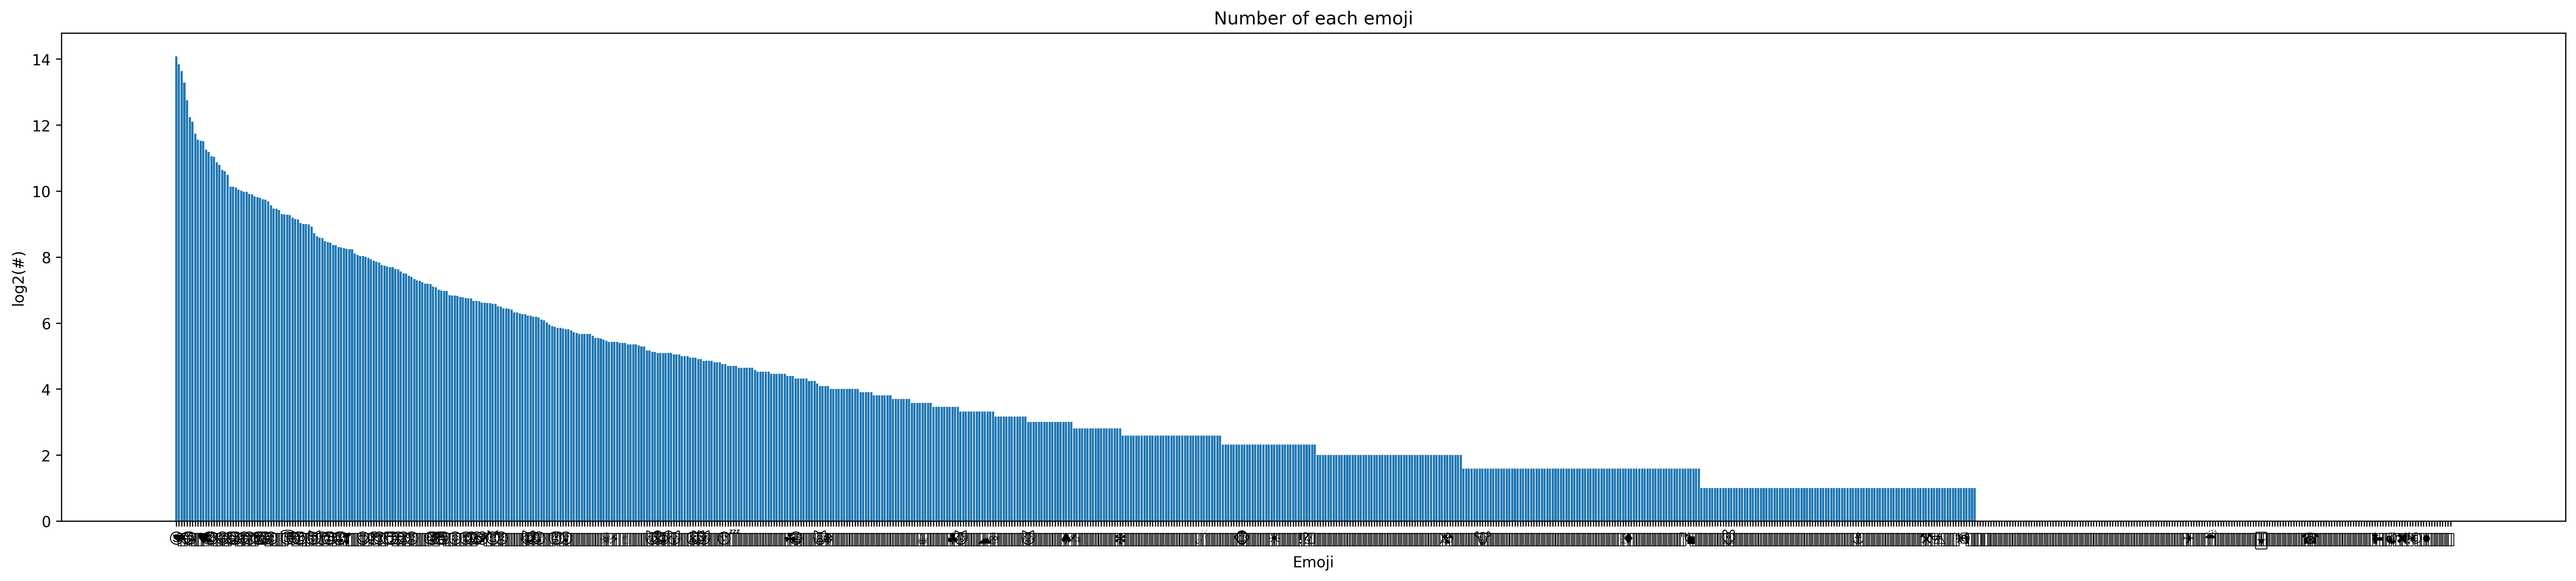

In [81]:
data_to_show = get_gt_value(emoji_dict, 0)

figure(figsize=(30, 6), dpi=300)

plt.bar(range(len(data_to_show)), np.log2(list(data_to_show.values())), align='center')
plt.xticks(range(len(data_to_show)), list(data_to_show.keys()))
plt.xlabel("Emoji")
plt.ylabel("log2(#)")
plt.title("Number of each emoji")
plt.show()

<h2 style='direction:rtl;font-family: "B Lotus";'>§ نرمال‌سازی</h2>

<div style='direction:rtl;font-family: "B Lotus";'>یک کلاس مجزا تعریف شده است که از کلاس <code>Normalizer</code> کتابخانه <code>hazm</code> ارث بری می&zwnj;کند. در این کلاس توابع زیر اضافه شده&zwnj;اند:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>تابع <code>__init__</code> صرفا به این منظور بازنویسی شده است که تابع <code>aug_data_init</code> را صدا بزند تا محتوای فایل مورد نیاز در متغیرها ذخیره شود. همچنین الفباهای مورد نیاز را مقدار دهی می کند.</li>
  <li>تابع <code>aug_data_init</code> فایلی را می&zwnj;خواند و در یک دیکشنری ذخیره می&zwnj;کند. این فایل غلط های متداولی که در متن وجود داشته است را در خود دارد و شکل صحیح آن را نوشته است و دیکشنری ساخته شده برهمین اساس می&zwnj;باشد.</li>
    <li>تابع <code>add_space_between_emoji_and_text</code> به منظور ایجاد فاصله میان متن و ایموجی‌ها می‌باشد.</li>
    <li>تابع <code>convert_to_basic_emoji</code> برخی از ایموجی‌ها که رنگ‌های مخلتف یا ساختارهای مختلف مبتنی بر یک پایه هستند را به حالت پایه تبدیل می‌کند</li>
    <li>تابع <code>normalize_emoji_len</code> تعداد ایموجی‌های موجود در متن را شمارش کرده و درصورتی که اختلاف تعداد آن‌ها با تعداد کاراکتر‌های غیر ایموجی متن بیش از <code>threshold</code> مشخصی باشد، از آن <code>threshold</code> به بعد، اجازه درج ایموجی را نمی‌دهد.</li>
    <li>تابع <code>replace_with_persian</code> برخی از کاراکترهایی که مشابه فارسی هستند ولی در الفبای فارسی نیستند را به مشابه فارسی آن‌ها تبدیل می‌کند.</li>
    <li>تابع <code>my_normalizer</code> ابتدا خود تابع <code>normalize</code> مربوط به کتابخانه <code>hazm</code> را صدا می کند و خروجی آن را گرفته و تغییرات لازم را متناسب با دیکشنری ای که توسط تابع <code>aug_data_init</code> مقدار دهی شده است را اعمال می&zwnj;کند تا این خطاها نیز رفع شود.</li>
</ul>

In [92]:
class MyNormalizer(hazm.Normalizer):
    
    def __init__(self, persian_alphabet, english_alphabet, decorative_signs, 
                 persian_numbers, english_numbers, emoji_alphabet):
        super().__init__()
        self.aug_data_init()
        self.persian_alphabet = persian_alphabet
        self.decorative_signs = decorative_signs
        self.english_alphabet = english_alphabet
        self.persian_numbers = persian_numbers
        self.english_numbers = english_numbers
        self.emoji_alphabet = emoji_alphabet
        
    def aug_data_init(self):
        f = open('./../data/augmented_data.txt', 'r')
        self.aug_data = f.readlines()
        f.close()
    
    def add_space_between_emoji_and_text(self, sent):
        res_sent = ''
        for i in range(len(sent)):
            if i+1 < len(sent):
                if (sent[i] in self.emoji_alphabet and sent[i+1] != ' ') or \
                    (sent[i] != ' ' and sent[i+1] in self.emoji_alphabet):
                    res_sent += sent[i] + ' '
                else:
                    res_sent += sent[i]
            else:
                res_sent += sent[i]
        return res_sent
    
    
    def convert_to_basic_emoji(self, sent):
        res_sent = ''
        for c in sent:
            if c in self.persian_alphabet or \
            c in self.decorative_signs or \
            c in self.english_alphabet or \
            c in self.persian_numbers or \
            c in self.english_numbers or \
            c in self.emoji_alphabet :
                res_sent += c
        return res_sent

    
    def normalize_emoji_len(self, text, threshold=300):
        emoji_num = 0
        persian_num = 0
        for t in text:
            if t not in self.persian_alphabet:
                emoji_num += 1
            elif t in self.persian_alphabet:
                persian_num += 1
        res_text = ''
        if emoji_num > persian_num + threshold:
            j = 0
            for i, t in enumerate(text):
                if t not in self.persian_alphabet:
                    j += 1
                if (j < persian_num + threshold and t in self.persian_alphabet) or (not (t in self.persian_alphabet)):
                    res_text += t
                
        else:
            res_text = text
        
        return res_text
    
    
    def replace_with_persian(self, sent):
        replace_list = {'ى':'ی',
                        'ة':'ه',
                        'ي':'ی'}
        
        for x in replace_list:
            sent = sent.replace(x, replace_list[x])
        
        return sent
    
    
    def my_normalizer(self, text):
        text = self.replace_with_persian(text)
        text = self.add_space_between_emoji_and_text(text)
        text = self.normalize_emoji_len(text)
        text = self.normalize(text)
        text = self.convert_to_basic_emoji(text)
        
        
        aug = {y[0]:y[1] for y in [x.replace('\n', '').split('\t') for x in self.aug_data]}

        for k in aug:
            while k in text:
                text = text.replace(k, aug[k])
        return text

In [93]:
normalizer = MyNormalizer(persian_alphabet, 
                          english_alphabet, 
                          decorative_signs, 
                          persian_numbers, 
                          english_numbers, 
                          emoji_alphabet
                          )

In [95]:
test_set = ["واقعااااا", "عاااالییییی", "عالیهههه", 'خداروششششکر', 'دم سازندش گرم😊', 'وانیامم🥳🥳👏', 'فوق العاده']
for i, t in enumerate(test_set):
    print(f'{i+1}\tBefore: {t}\t\tAfter: {normalizer.my_normalizer(t)}')

1	Before: واقعااااا		After: واقعا
2	Before: عاااالییییی		After: عالی
3	Before: عالیهههه		After: عالیه
4	Before: خداروششششکر		After: خداروشکر
5	Before: دم سازندش گرم😊		After: دم سازندش گرم 😊
6	Before: وانیامم🥳🥳👏		After: وانیامم 🥳 🥳 👏
7	Before: فوق العاده		After: فوق العاده


<div style='direction:rtl;font-family: "B Lotus";'>پیش پردازش اولیه متن:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>حذف <code>n\</code> ها</li>
  <li>حذف <code>space</code> های اضافه ابتدا و انتهای متن</li>
  <li>شکستن متن از نقاط دارای <code>space</code></li>
  <li>فقط کامنت‌های انتخاب می‌شوند که حتما متن فارسی نیز داشته باشند</li>
</ul>  

In [97]:
comments = []
for comment in tqdm(comments_with_emoji):
    for c in persian_alphabet:
        if c in comment:
            comments.append(comment.replace("&#039;", "\'").replace('\n', '').strip().split())
            break

print(f"Comments number: {len(comments)}")

100%|█████████████████████████████████████████████████████████████████████████| 91291/91291 [00:00<00:00, 806286.44it/s]

Comments number: 86801


In [98]:
for x in random.sample(comments, 30):
    print(' '.join(x))

خیلییی محشر بود حیف شد گین مرد من کلی گریه کردم ،😔☹️😢😢🤕🤒🤧
عالی بود مرسی ❤️🌹
امیر مقاره هم هس🤩🥺😛🤩🤩🤩🤩🤩🤩🤩
وااای فوق العاده قشنگ بود ، تابحال فیلم به این زیبایی ندیده بودم😍
خیلی عالی بود خوشم اومد 🌹
من تو سینما دیدم خیلی خنده دار داره 🤣🤣🤣
باحال ببوددددد😅😅😅😅
عاشق این فیلمم عالی بود بی نظیر مخصوصا آقا رضا گلزار ❤
این عا لی 😉😉😉😉😉😇😉😇🎂🎂🎂🎂🎂🎂😍😍😍😍😍😇😇😇😇
من خیلی خیلی دوست داشتم فیلم رو 💜💜💜
خیلییئییییییییییییی عالیه😍
فقط رضا نیکخواه😂😂😂
واقعاعالی بود حتمه ببیننش 👍👍👍
مامانم‌این‌فیلمو‌دوست‌داره😃😃😃😃😃😃
بسیار عالی 😍
بامزه بود😍😍
عالی بود ♥️♥️♥️♥️
واقعا خیلی دوست دارم چون که هر فیلم ایرانی آخرش بد تموم میشه ولی این واقعا آخرش عالی تموم شد ممنون از کارگردان و همچنین تهیه کننده ممنونم بابت فیلمی که ساختید بازم ممنونم ❤❤♥️♥️♥️😍😍😍😍
خیلی خنده داشت 😂😂😂
عالی عالی من عاشقش شدم اگه میشه (مرحله ۲ )هم بزارید ممنون😍
فیلم خیلی قشنگی هست 😍😍
عاااالی😭
عاااااالی 👍
فوق العاده بود❤
سحر قریشی خوب بازی کرد😍به پورسرخ هم طنز میاد
جالب بود دوسداشتم😊
ولی بلک پینک یه چیز دیگست💖🖤
فیلم خیلی جذابی بود من خودم خیلی خوشم اومد چون هزینه ها

<div style='direction:rtl;font-family: "B Lotus";'>نرمال‌سازی به کمک تابع <code>my_normalizer</code> انجام می شود که شامل بخش‌های زیر می‌باشد:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>اجرای تابع <code>normalizer</code> کتابخانه <code>hazm</code></li>
  <li>با استفاده از تابع <code>add_space_between_emoji_and_text</code> در مواردی که بین متن و ایموجی فاصله‌ای وجود ندارد، فاصله ایجاد می کند.</li>
    <li>با استفاده از تابع <code>normalize_emoji_len</code> تعداد ایموجی‌های موجود در متن نرمالایز می‌شود.</li>
  <li>بعضی از اشتباهات یا حالت‌هایی که در متن به صورت محاوره‌ای استفاده می‌شود، اصلاح می‌شود.</li>
</ul>  

In [99]:
comments_normalized = [[normalizer.my_normalizer(y) for y in x] for x in tqdm(comments)]

100%|███████████████████████████████████████████████████████████████████████████| 86801/86801 [00:51<00:00, 1697.39it/s]


In [100]:
for x in random.sample(comments_normalized, 50):
    print(' '.join(x))

اگر همچین ویروسی ساخته بشه واقعا چی؟ 🤦  ♀ 
خیلی با حال بود 😍 ❤ ❤ ❤
عالی 😍 😍 😍 😍 😍
جذاب بود 👍 
♥ ♥ ♥ ♥ ♥ ♥ ♥ ♥ ♥ ♥ ♥ ♥ ♥ ممنونم فیلم دوست دارم
دم محمد حسین مهدویان و جواد عزتی گرم ترکوندن 🎇
فیلم فوق العاده خوبی خنده دار هم هست عالیه 👍 👍 🌹 🌹
عالی 😍 😍 😍 😍
فک کنم این فیلم عالی باشهچون هم اسپایدر من و هم ونوم توش هستن 🤩
عالی ❤  ❤  ❤  ❤  ❤  ❤  ❤  ❤  ❤  ❤  ❤  ❤  ❤  ❤  💜 💜 💜 💜 💜 💜 💜 💜 💜 💜 💜 💜 💜 💜
دوبله عالی 😂 😂 😂
فقط اخرش که بابای سو آن مرد من خیلی خیلی گریه کردم 😭 😭 😭 💔 💔 💔
عالی ترسناک نیست 😍
عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی 👑 👑 👑 👑 👑 👑 👑 👑
سلام وهزاران دورودکارتون عالی بود خیلی قشنگ بودممنون 🥰 ❤ 🌹
خیلی خنده دار بود 😂 😂 😂 😂 😂
من عاشق این فیلم شدم خیلی خیلی خوب بود 💗 💗
خیلی قشنگهممنون بابت فیلم زیباتون 💛 👬 🌻
👌  👌  👌  👌  👌  👌  👌  👌  بسیار عالی
پسندیدیم 😎
ممنون از کسی که این فیلم رو ساخته عالی بود فقط مرده ۴تا زن داشت 😑
واقعا امین حیایی و بیژن بنفشه خواه همه و همه عالی بودن 😂
عالی بود حتما ببینید  👌
بر اساس واقعیت بود 😭
من نیسان آبی رو دوست دارم 💐 💐 💐 🌸 🌸
‌از

<h2 style='direction:rtl;font-family: "B Lotus";'>§ جمله‌بندی</h2>

<div style="direction:rtl; font-family: 'B Lotus'">در این بخش کامنت ها را به جملات تشکیل دهنده می‌شکنی؛ این کار به کمک تابع <code>sent_tokenize</code> کتابخانه <code>hazm</code> انجام شده است.</div>

In [101]:
comments_sentences = [hazm.sent_tokenize(' '.join(x)) for x in tqdm(comments_normalized)]

100%|█████████████████████████████████████████████████████████████████████████| 86801/86801 [00:00<00:00, 420120.11it/s]


In [102]:
for x in random.sample(comments_sentences, 50):
    print(' ### '.join(x))

عالی بود 👌 👌 👌 👌
سلام 🤩
فقط میرطاهر 🤣 🤣 🤣
یه فیلم با قبلیت ترمیم روح و حال خوب کن 😍 😍 😍 😍 😍
یکی از بهترین ها بود واقعا فقط میشه گفت دمشون گرم عالی 👏 👏 👏 👌 👌 👌
این فیلم عالی بود حتما ببینید من سه بار خودم دیدم چند بار هم با دوستانم ممنون از سازندش ❤ ❤ ❤ ❤ ❤ 👧 👧 ♥ ♥
عالیه عالیه حتما ببینید 😍 👏 👏 👏 👌 👌 👌
ژاله صامتی 👌 👌 👌
الی بود 👌 👌 👌 👌 👆
دلم برای دابی سوخت ☹ 😭 💔
بی نظیر ♥  ♥  ♥  ♥  ♥  ♥  ♥  ♥
خوب بود پسندیدم 👌
امیر مهدی ژوله رو عشقه ❤ ❤ ❤ ❤ ❤ ❤
خیلی خوبه 😍 😍 😍 😍 هرکی دوست داشت لایک کنه 😍 😍 😍 😍 😅 😅 😅
وای باور نکردنیی دینامیت امده 🤩 🤩 🤩 🤩
عالی بود 💜 🖤 🤍
خیلی خیلی عالی بود مرسی از فیلمو 👍 👍 👍 👍 👍
بهترین فیلمی هست که من دیدمولی بنزرم می نباید می مرد آخه چرا 😭
بعضی ها خیلی سوال های مسخره میپرسند 😐 فیلم خیلی قشنگی
عالی بود 👍 👌 ❤
واقعا طنز زیبایی داشت 😂
بهترین دیالوگ این فیلم این بود: «اینقدر نبض یک رابطه‌ی مرده را نگیر» 🌿 🌹 🌿 🌹 🌿 🌹 🌿 🌹
عالی 👍 👍
انگار یه جای نوشته بود تا اخرهای ماه تیر بیادکاش به زودی اکران بشه طاقت ندارم ❤
آلی بود 😍 😍
حرف نداشت یعنی عالی بود 😍 😍
خیلی فیلم قشنگی هست من عاششق پا

<h2 style='direction:rtl;font-family: "B Lotus";'>§ توکنیزیشن</h2>

<div style="direction:rtl; font-family: 'B Lotus'">این بخش جملات جدا شده را به تفکیک بررسی کرده و به کلمات سازده آن می‌شکنیم؛ برای این منظور از تابع <code>my_word_tokenize</code> استفاده می‌کنیم که در ادامه توضیح داده شده است.</div>

<div style="direction:rtl; font-family: 'B Lotus'">تابع <code>my_word_tokenize</code> ابتدا جمله را به تابع <code>word_tokenize</code> کتابخانه <code>hazm</code> می دهد و خروجی آن را بررسی کرده که در صورت وجود برخی از کلمات خاص که نیاز به اصلاح دارند، آن‌ها را اصلاح کرده و کلمات نهایی را برگرداند.</div>

In [110]:
def my_word_tokenize(self, sent):
    res_token = []
    n_gram = {'فوق‌العاده': ['فوق', 'العاده'],
              'غم‌انگیز': ['غم', 'انگیز'],
              'هیجان‌انگیز': ['هیجان', 'انگیز']}
    tokens = hazm.word_tokenize(sent)
    i = 0
    while i < len(tokens)-1:
        for aug in n_gram:
            if tokens[i] == n_gram[aug][0] and tokens[i+1] == n_gram[aug][1]:
                res_token.append(aug)
                i += 2
            else:
                res_token.append(tokens[i])
                i += 1
            if i >= len(tokens)-1:
                break
    return res_token

In [104]:
comments_tokens = [[my_word_tokenize(sent) for sent in sents] for sents in tqdm(comments_sentences)]

100%|█████████████████████████████████████████████████████████████████████████| 86801/86801 [00:00<00:00, 116894.91it/s]


In [105]:
for x in random.sample(comments_tokens, 50):
    print(x)

[['خوب', 'نیست', 'عالیه', '🤩', '🤩', '🤩', '🤩', '🤩']]
[['عالی', '❤', '❤', '❤']]
[['بهترین', 'و', 'عالی', 'ترین', 'فیلم', 'ایرانی', '👍', '👍', '👍', '👍', '👍', '👌', '👌', '👌']]
[['فیلیمی', 'که', 'حتی', 'چند', 'روز', 'بعد', 'دیدنش', 'درگیرشیعالی', 'بود']]
[['خیلی', 'عالی', 'بود', 'حتما', 'ببینید', '🥰', '🥰']]
[['خیلی', 'ممنون', 'از', 'معرفی', 'دقیق', 'بازیگران', '😂']]
[['بعضیا', 'پرسیدند', 'که', 'اخر', 'فیلم', 'چی', 'شد', 'و', 'اخرش', 'باز', 'بود', 'باید', 'بگم', 'ک', 'اصلا', 'پایانه', 'بازی', 'نداشت', 'اون', 'مرده', 'که', 'زن', 'و', 'بچش', 'رو', 'کشت', 'بعد', 'از', 'این', 'که', 'کشت', 'دچار', 'یه', 'اختلالی', 'شد', 'که', 'یه', 'توهم', 'خیلی', 'بزرگی', 'زدو', 'فک', 'کرد', 'که', 'فقط', 'بچش', 'از', 'بلندی', 'افتاد', 'و', 'فقط', 'دستش', 'شکست', 'و', 'زنشم', 'زندس', 'بعد', 'می', 'ره', 'بیمارستان', 'برای', 'دسته', 'بچش', 'ولی', 'اون', 'جا', 'هم', 'یه', 'توهم', 'می', 'زنه', 'که', 'تویه', 'بیمارستان', 'یه', 'طبقه', 'ای', 'هست', 'که', 'همه', 'ی', 'اعضایه', 'بدن', 'رو', 'در', 'میارن', 'و', 'می', 'فروشن

In [238]:
# f = open('./../result/sam.txt', 'w')
# for x in random.sample(comments_tokens, 700):
#     f.write(f"{'--'.join(x[0])}\n")
# f.close()

<h2 style='direction:rtl;font-family: "B Lotus";'>§ تحیلی بسامد</h2>

<div style="direction:rtl; font-family: 'B Lotus'">در این قسمت به بررسی کلمات پرتکرار متن می‌پردازیم تا بتوانیم شناخت بهتری از کسب کنیم.</div>

<div style="direction:rtl; font-family: 'B Lotus'">در بخش اول تمامی توکن‌ها (کلمات) را بررس می‌کنیم تا وضعیت کلی از کلمات پرتکرار به دست اید.</div>

In [106]:
tokens = list(itertools.chain(*itertools.chain(*comments_tokens)))

data = FreqDist(tokens).most_common(60)

freq_analysis = pd.DataFrame(data, columns=['token', 'freq'])  
freq_analysis

,token,freq
0,عالی,43699
1,بود,42819
2,😍,38995
3,❤,35685
4,خیلی,29623
5,👌,20256
6,👍,19529
7,و,15166
8,فیلم,14251
9,😂,13821


<div style="direction:rtl; font-family: 'B Lotus'">یک تحلیل کلی از تعداد کلمات، تعداد کلمات یکتا، میانگین طول کلمات و بزرگترین کلمه موجود در متن</div>

In [107]:
print ('%-16s' % 'Number of words', '%-16s' % len(tokens))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(tokens)))
avg=np.sum([len(word) for word in tokens])/len(tokens)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % tokens[np.argmax([len(word) for word in tokens])])

Number of words  895263          
Number of unique words 22797           
Average word length 2.9556755947693585
Longest word     خیلی‌عالی‌بود‌من‌مرینت‌هستم‌و‌از‌دختر‌کفشدوزکی‌واقعا‌خوشم‌اومده‌تا‌حالا‌ماجرا‌جویی‌در‌پاریس‌رو‌ندیده‌بود‌ولی‌حالا‌عاشقش‌شدم‌


<h2 style='direction:rtl;font-family: "B Lotus";'> § حذف stop-word  </h2> 

<div style="direction:rtl; font-family: 'B Lotus'">در این بخش تلاش می‌کنیم با حذف stop-words کلماتی که مفهومی در کانتکس ما دارند و پرتکرار هستند را شناسایی کنیم؛ برای این منظور سه حالت مختلف را بررسی می‌کنیم (فایل <code>stopwords.txt</code> شامل کلماتی می‌باشد که به عنوان stop-words در نظر گرفته شده است، در انتهای آن موارد متناسب با متن کامنت ها نیز اضافه شده است.):</div>
<ul style="direction:rtl; font-family: 'B Lotus'">
    <li>بررسی بسامد در حالتی که فقط کلمات فارسی stop-word حذف شده اند (حالت <code>nonstop</code> در جدول)</li>
    <li>بررسی بسامد در حالتی که فقط ایموجی‌های متن حذف شده اند (حالت <code>nonemoji</code> در جدول)</li>
    <li>بررسی بسامد در حالتی که هم ایموجی‌ها و هم stop-words فارسی حذف شده اند (حالت <code>nonstop_nonemoji</code> در جدول)</li>
</ul>

In [113]:
stopwords = [normalizer.normalize(x.strip()) for x in codecs.open('./../data/stopwords.txt','r','utf-8').readlines()]
stopwords_withemoji = stopwords.copy()
stopwords_withemoji.extend(emoji_alphabet)

In [121]:
tokens_nonstop = [t for t in tqdm(tokens) if t not in stopwords]
tokens_nonemoji = [t for t in tqdm(tokens) if t not in emoji_alphabet]
tokens_nonstop_nonemoji = [t for t in tqdm(tokens) if t not in stopwords_withemoji]

data_nonstop = {}
num = 60
data_nonstop['nonstop'] = FreqDist(tokens_nonstop).most_common(num)
data_nonstop['nonemoji'] = FreqDist(tokens_nonemoji).most_common(num)
data_nonstop['nonstop_nonemoji'] = FreqDist(tokens_nonstop_nonemoji).most_common(num)

freq_analysis = pd.DataFrame(data_nonstop)
freq_analysis

100%|███████████████████████████████████████████████████████████████████████| 895263/895263 [00:04<00:00, 204604.47it/s]


,nonstop,nonemoji,nonstop_nonemoji
0,"(😍, 38995)","(عالی, 43699)","(قشنگ, 6370)"
1,"(❤, 35685)","(بود, 42819)","(واقعا, 6143)"
2,"(👌, 20256)","(خیلی, 29623)","(عالیه, 4147)"
3,"(👍, 19529)","(و, 15166)","(حتما, 3915)"
4,"(😂, 13821)","(فیلم, 14251)","(دیدم, 3003)"
5,"(😘, 13267)","(این, 10250)","(ممنون, 2710)"
6,"(👏, 10130)","(که, 9405)","(زیبا, 2403)"
7,"(🤣, 7706)","(از, 8984)","(دوست, 2358)"
8,"(🤩, 7353)","(من, 8732)","(خنده, 2175)"
9,"(♥, 6552)","(خوب, 6764)","(فوق‌العاده, 2046)"


<h2 style='direction:rtl;font-family: "B Lotus";'> § ابرواژه کلمات  </h2> 

<div style="direction:rtl; font-family: 'B Lotus'">با استفاده از کتابخانه <code>WordCloudFa</code> که شخصی سازی شده برای زبان فارسی می باشد هر سه حالت بالا را به شکل ابرواژه بررسی می کنیم:</div>
<em>
    <div style="direction:rtl; font-family: 'B Lotus'">(این کتابخانه به صورت پیش‌فرض بعضی از stop-words را حذف می کند)</div>
</em>


In [126]:
text = ' '.join(tokens_nonstop)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonstop_wordcloud.png')

In [127]:
text = ' '.join(tokens_nonemoji)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonemoji_wordcloud.png')

In [129]:
text = ' '.join(tokens_nonstop_nonemoji)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonstop_nonemoji_wordcloud.png')

<div style="content: '';clear: both; display: table;">
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonstop_wordcloud</center>
        <img src="./../result/tokens_nonstop_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonemoji_wordcloud</center>
        <img src="./../result/tokens_nonemoji_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonstop_nonemoji_wordcloud</center>
        <img src="./../result/tokens_nonstop_nonemoji_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
</div>

<h2 style='direction:rtl;'> § استفاده از lemmatization, stemming  </h2> 